In [41]:
import pandas as pd

In [82]:
df = pd.read_csv('../data/LCK_player_stats.csv')
df2 = pd.read_csv('../data/LCK_player_role.csv')

df = df.merge(df2, on=['Player', 'Year', 'Split'])


In [83]:
clean_df = df.copy()
clean_df['Win Rate:'] = df['Win Rate:'].str.rstrip('%').astype('float') / 100.0
clean_df['Gold%:'] = df['Gold%:'].str.rstrip('%').astype('float') / 100.0
clean_df['Kill Participation:'] = df['Kill Participation:'].str.rstrip('%').astype('float') / 100.0

clean_df['KDA:'] = pd.to_numeric(df['KDA:'], errors='coerce')
clean_df['CS per Minute:'] = pd.to_numeric(df['CS per Minute:'], errors='coerce')
clean_df['Gold Per Minute:'] = pd.to_numeric(df['Gold Per Minute:'], errors='coerce')


In [84]:
# 5 different roles : ['BOT' 'SUPPORT' 'MID' 'TOP' 'JUNGLE']
print(df["Role"].unique())

['BOT' 'SUPPORT' 'MID' 'TOP' 'JUNGLE']


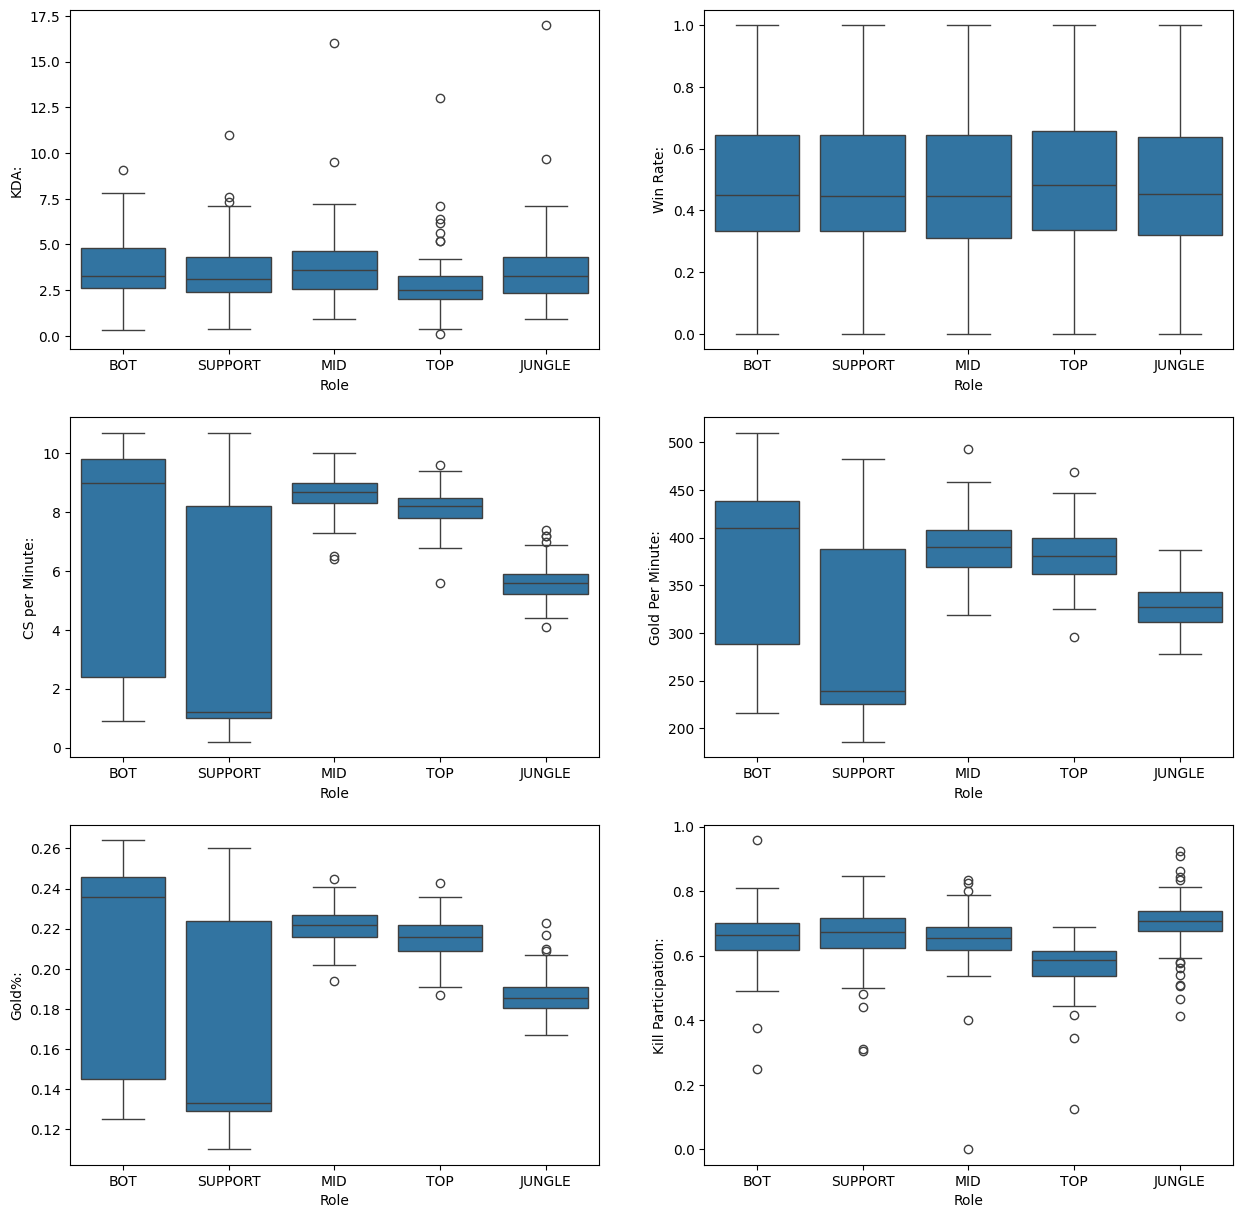

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDA, Win Rate, CS per Minute, Gold Per Minute, Gold%, Kill Participation boxplot by role

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.boxplot(ax=axes[0, 0], x="Role", y="KDA:", data=clean_df)
sns.boxplot(ax=axes[0, 1], x="Role", y="Win Rate:", data=clean_df)
sns.boxplot(ax=axes[1, 0], x="Role", y="CS per Minute:", data=clean_df)
sns.boxplot(ax=axes[1, 1], x="Role", y="Gold Per Minute:", data=clean_df)
sns.boxplot(ax=axes[2, 0], x="Role", y="Gold%:", data=clean_df)
sns.boxplot(ax=axes[2, 1], x="Role", y="Kill Participation:", data=clean_df)

plt.show()



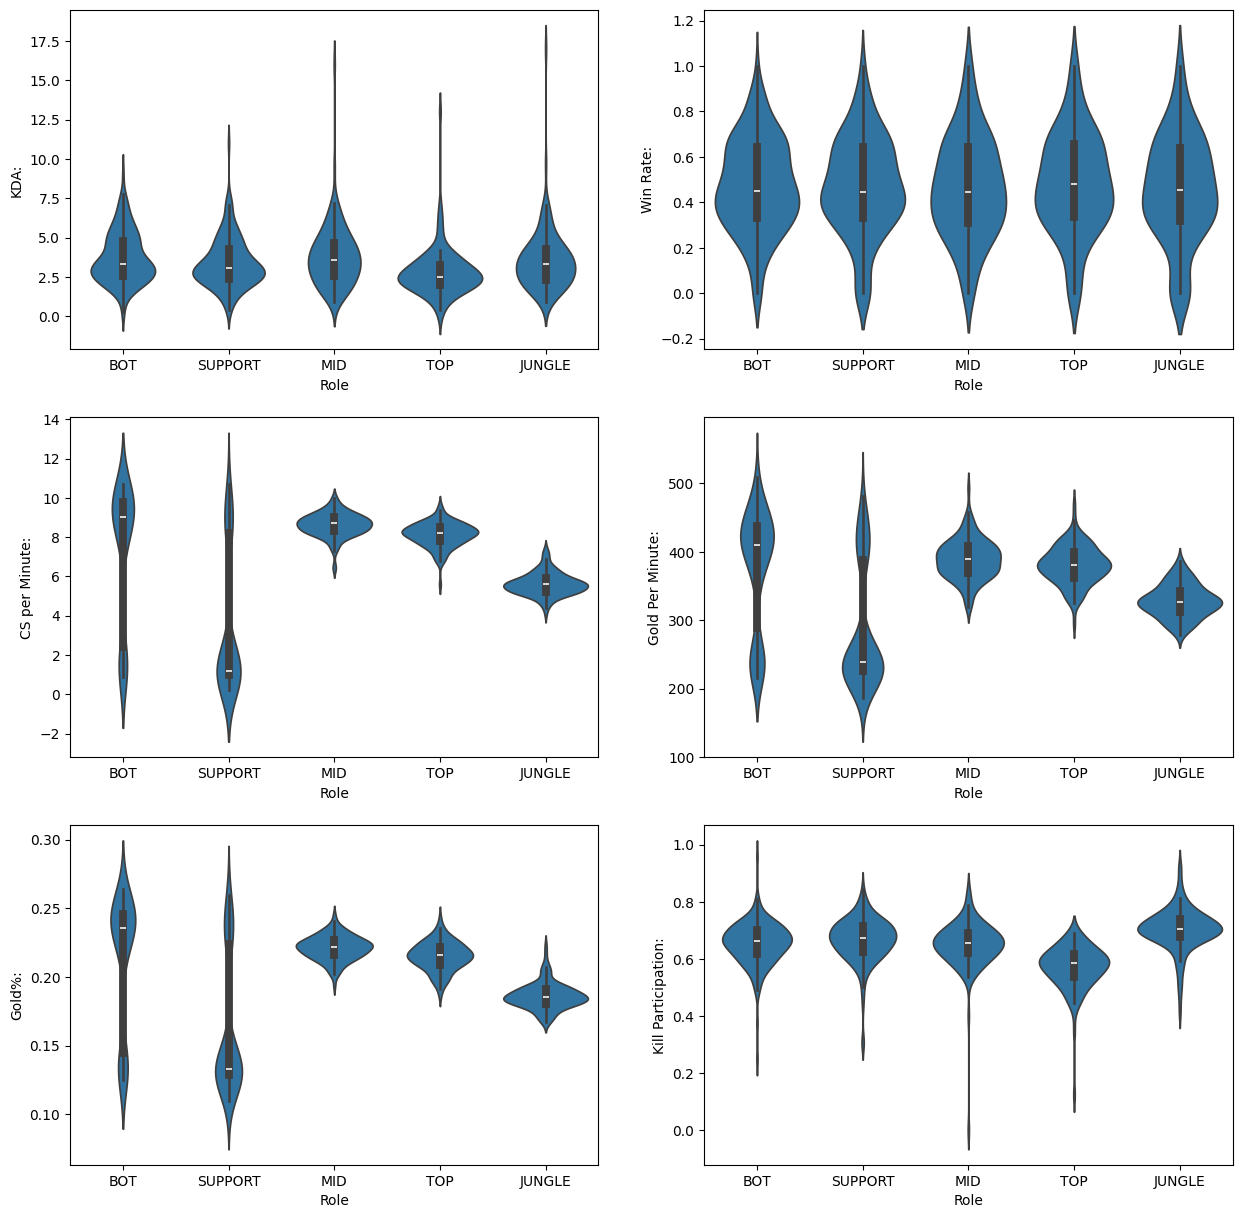

In [86]:
# # KDA, Win Rate, CS per Minute, Gold Per Minute, Gold%, Kill Participation violinplot by role

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.violinplot(ax=axes[0, 0], x="Role", y="KDA:", data=clean_df)
sns.violinplot(ax=axes[0, 1], x="Role", y="Win Rate:", data=clean_df)
sns.violinplot(ax=axes[1, 0], x="Role", y="CS per Minute:", data=clean_df)
sns.violinplot(ax=axes[1, 1], x="Role", y="Gold Per Minute:", data=clean_df)
sns.violinplot(ax=axes[2, 0], x="Role", y="Gold%:", data=clean_df)
sns.violinplot(ax=axes[2, 1], x="Role", y="Kill Participation:", data=clean_df)

plt.show()

In [90]:
# Variance of KDA, Win Rate, CS per Minute, Gold Per Minute, Gold%, Kill Participation by role

print(clean_df.groupby('Role')["KDA:"].var())
print(clean_df.groupby('Role')["Win Rate:"].var())
print(clean_df.groupby('Role')["CS per Minute:"].var())
print(clean_df.groupby('Role')["Gold Per Minute:"].var())
print(clean_df.groupby('Role')["Gold%:"].var())
print(clean_df.groupby('Role')["Kill Participation:"].var())


Role
BOT        2.617353
JUNGLE     3.787577
MID        3.838113
SUPPORT    2.484378
TOP        2.365423
Name: KDA:, dtype: float64
Role
BOT        0.041184
JUNGLE     0.055137
MID        0.049894
SUPPORT    0.046285
TOP        0.049619
Name: Win Rate:, dtype: float64
Role
BOT        12.451066
JUNGLE      0.327493
MID         0.363011
SUPPORT    12.597850
TOP         0.383026
Name: CS per Minute:, dtype: float64
Role
BOT        7477.065900
JUNGLE      571.193334
MID         855.346743
SUPPORT    7505.589516
TOP         773.438634
Name: Gold Per Minute:, dtype: float64
Role
BOT        0.002294
JUNGLE     0.000090
MID        0.000078
SUPPORT    0.002320
TOP        0.000108
Name: Gold%:, dtype: float64
Role
BOT        0.006101
JUNGLE     0.005433
MID        0.007618
SUPPORT    0.006101
TOP        0.006008
Name: Kill Participation:, dtype: float64


In [92]:
from scipy.stats import bartlett

# Bartlett test for KDA, Win Rate, CS per Minute, Gold Per Minute, Gold%, Kill Participation by role

print("KDA")
print(bartlett(clean_df[clean_df['Role'] == 'BOT']["KDA:"], clean_df[clean_df['Role'] == 'SUPPORT']["KDA:"], clean_df[clean_df['Role'] == 'MID']["KDA:"], clean_df[clean_df['Role'] == 'TOP']["KDA:"], clean_df[clean_df['Role'] == 'JUNGLE']["KDA:"]))
print("Win Rate")
print(bartlett(clean_df[clean_df['Role'] == 'BOT']["Win Rate:"], clean_df[clean_df['Role'] == 'SUPPORT']["Win Rate:"], clean_df[clean_df['Role'] == 'MID']["Win Rate:"], clean_df[clean_df['Role'] == 'TOP']["Win Rate:"], clean_df[clean_df['Role'] == 'JUNGLE']["Win Rate:"]))
print("CS per Minute")
print(bartlett(clean_df[clean_df['Role'] == 'BOT']["CS per Minute:"], clean_df[clean_df['Role'] == 'SUPPORT']["CS per Minute:"], clean_df[clean_df['Role'] == 'MID']["CS per Minute:"], clean_df[clean_df['Role'] == 'TOP']["CS per Minute:"], clean_df[clean_df['Role'] == 'JUNGLE']["CS per Minute:"]))
print("Gold Per Minute")
print(bartlett(clean_df[clean_df['Role'] == 'BOT']["Gold Per Minute:"], clean_df[clean_df['Role'] == 'SUPPORT']["Gold Per Minute:"], clean_df[clean_df['Role'] == 'MID']["Gold Per Minute:"], clean_df[clean_df['Role'] == 'TOP']["Gold Per Minute:"], clean_df[clean_df['Role'] == 'JUNGLE']["Gold Per Minute:"]))
print("Gold%")
print(bartlett(clean_df[clean_df['Role'] == 'BOT']["Gold%:"], clean_df[clean_df['Role'] == 'SUPPORT']["Gold%:"], clean_df[clean_df['Role'] == 'MID']["Gold%:"], clean_df[clean_df['Role'] == 'TOP']["Gold%:"], clean_df[clean_df['Role'] == 'JUNGLE']["Gold%:"]))
print("Kill Participation")
print(bartlett(clean_df[clean_df['Role'] == 'BOT']["Kill Participation:"], clean_df[clean_df['Role'] == 'SUPPORT']["Kill Participation:"], clean_df[clean_df['Role'] == 'MID']["Kill Participation:"], clean_df[clean_df['Role'] == 'TOP']["Kill Participation:"], clean_df[clean_df['Role'] == 'JUNGLE']["Kill Participation:"]))


KDA
BartlettResult(statistic=13.839102131192302, pvalue=0.00782668253663558)
Win Rate
BartlettResult(statistic=3.0573858475450963, pvalue=0.5482683700990886)
CS per Minute
BartlettResult(statistic=744.7468598158381, pvalue=7.118977051225028e-160)
Gold Per Minute
BartlettResult(statistic=377.3139617178512, pvalue=2.2145376752624645e-80)
Gold%
BartlettResult(statistic=641.1870814456086, pvalue=1.884957868394673e-137)
Kill Participation
BartlettResult(statistic=3.7152792519571203, pvalue=0.4459075446239791)


In [95]:
# Winrate, CS per Minute, Gold Per Minute, Gold%, higher pvalue than 0.05, so we can't reject null hypothesis
# KDA, Kill Participation, lower pvalue than 0.05, so we can reject null hypothesis

from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols

print("# Shapiro test")
model = ols('KDA: ~ Role', data = clean_df).fit()
print(shapiro(model.resid))

# Shapiro test


PatsyError: ~ can only be used once, and only at the top level
    KDA: ~ Role
         ^^^^^^